In [1]:
import pandas as pd
import collections
import numpy as np
import seaborn as sns

from langdetect import detect

In [2]:
# df = pd.read_csv('./brazil/brazil_reviews.csv')
df = pd.read_csv('./samerica/santiago.csv')

In [3]:
df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,50474,8276136,2013-10-23,8290843,Gabriela,"Mi estadía realmente perfecta, todo fue según ..."
1,50474,10420113,2014-02-18,8184070,Billy,"I enjoyed my stay in Santiago, Marcela was ext..."
2,50474,24678242,2015-01-01,18980773,José,Excelente todo. Marcela respondió siempre de m...
3,50474,27199976,2015-02-28,24664479,José Luis,"Excelente apartamento, muy bien ubicado cómodo..."
4,50474,45968933,2015-09-07,17323703,Natalia,El apartamento estaba en una localización inme...
...,...,...,...,...,...,...
168391,32872380,422939699,2019-03-12,5707476,Rodrigo,Todo muy bien.
168392,32922550,422013594,2019-03-10,191068588,Ryan,Amazing location. Great value. Host is very fl...
168393,32937492,422623550,2019-03-11,9485715,Amy,This was an incredible home with everything an...
168394,32980744,423027925,2019-03-12,222290532,Elon,The host canceled this reservation 32 days bef...


In [25]:
df2 = df[df.comments.str[:34] != "The host canceled this reservation"]
df2

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,50474,8276136,2013-10-23,8290843,Gabriela,"Mi estadía realmente perfecta, todo fue según ..."
1,50474,10420113,2014-02-18,8184070,Billy,"I enjoyed my stay in Santiago, Marcela was ext..."
2,50474,24678242,2015-01-01,18980773,José,Excelente todo. Marcela respondió siempre de m...
3,50474,27199976,2015-02-28,24664479,José Luis,"Excelente apartamento, muy bien ubicado cómodo..."
4,50474,45968933,2015-09-07,17323703,Natalia,El apartamento estaba en una localización inme...
...,...,...,...,...,...,...
168390,32872175,422605465,2019-03-11,166886186,Sebastián,"Lugar limpio y bonito, con espacios agradables..."
168391,32872380,422939699,2019-03-12,5707476,Rodrigo,Todo muy bien.
168392,32922550,422013594,2019-03-10,191068588,Ryan,Amazing location. Great value. Host is very fl...
168393,32937492,422623550,2019-03-11,9485715,Amy,This was an incredible home with everything an...


In [26]:
# mean review length ignoring languages
df3 = df2['comments']
dfl = df3.str.len()
dfl.mean(axis = 0)

233.2059421715541

In [8]:
# creates table with languages distribution
langs = []
for i in df3:
    try:
        langs.append(detect(i))
    except:
        langs.append('Nan')
        continue

In [9]:
c = collections.Counter(langs)
freq = pd.DataFrame.from_dict(c, orient='index').reset_index()

In [11]:
freq = freq.apply(lambda x: x/len(df3) if x.name == 0 else x)

,index,0
0,es,0.519418
1,en,0.243199
2,pt,0.192613
3,fr,0.015617
4,de,0.006997
5,ko,0.002105
6,af,0.000477
7,so,0.000621
8,it,0.002908
9,ro,0.004934


In [12]:
freq_sorted = freq.sort_values(by= [0], ascending=False)
freq_sorted

,index,0
0,es,0.519418
1,en,0.243199
2,pt,0.192613
3,fr,0.015617
4,de,0.006997
9,ro,0.004934
8,it,0.002908
13,Nan,0.002895
5,ko,0.002105
14,ca,0.001267


In [13]:
export = freq_sorted.reset_index(drop=True)

In [15]:
export.to_csv(r'santiagolangs.csv')

In [29]:
# begin analysing specific languages
dfnew = df2.copy()
dfnew['lang'] = langs
dfnew

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang
0,50474,8276136,2013-10-23,8290843,Gabriela,"Mi estadía realmente perfecta, todo fue según ...",es
1,50474,10420113,2014-02-18,8184070,Billy,"I enjoyed my stay in Santiago, Marcela was ext...",en
2,50474,24678242,2015-01-01,18980773,José,Excelente todo. Marcela respondió siempre de m...,es
3,50474,27199976,2015-02-28,24664479,José Luis,"Excelente apartamento, muy bien ubicado cómodo...",es
4,50474,45968933,2015-09-07,17323703,Natalia,El apartamento estaba en una localización inme...,es
...,...,...,...,...,...,...,...
168390,32872175,422605465,2019-03-11,166886186,Sebastián,"Lugar limpio y bonito, con espacios agradables...",es
168391,32872380,422939699,2019-03-12,5707476,Rodrigo,Todo muy bien.,es
168392,32922550,422013594,2019-03-10,191068588,Ryan,Amazing location. Great value. Host is very fl...,en
168393,32937492,422623550,2019-03-11,9485715,Amy,This was an incredible home with everything an...,en


In [37]:
# first english
df_en = dfnew.loc[dfnew['lang'] == 'en'].copy()

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang
1,50474,10420113,2014-02-18,8184070,Billy,"I enjoyed my stay in Santiago, Marcela was ext...",en
6,50474,52984230,2015-11-03,19365321,Seamus,Great apartment near the metro and a good shop...,en
8,50474,55534788,2015-12-01,3364197,Milli,Great place! Really enjoyed the location of wh...,en
10,50474,56850064,2015-12-19,47757691,Andrei,Everything was like in the pictures/descriptio...,en
12,50474,59382872,2016-01-10,50306842,Adriana,Marcela was very helpful and always comunicate...,en
...,...,...,...,...,...,...,...
168367,32743129,420036261,2019-03-05,93914498,Lise,"great location\ngreat host, big heart",en
168369,32758218,420373154,2019-03-06,56941543,Alex,The location of the apartment is great - reall...,en
168370,32758218,422086740,2019-03-10,63308747,Jeffrey,"I highly recommend staying at this Airbnb, it ...",en
168392,32922550,422013594,2019-03-10,191068588,Ryan,Amazing location. Great value. Host is very fl...,en


In [39]:
df_en['len'] = df_en['comments'].str.len()
df_en

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang,len
1,50474,10420113,2014-02-18,8184070,Billy,"I enjoyed my stay in Santiago, Marcela was ext...",en,86
6,50474,52984230,2015-11-03,19365321,Seamus,Great apartment near the metro and a good shop...,en,198
8,50474,55534788,2015-12-01,3364197,Milli,Great place! Really enjoyed the location of wh...,en,270
10,50474,56850064,2015-12-19,47757691,Andrei,Everything was like in the pictures/descriptio...,en,124
12,50474,59382872,2016-01-10,50306842,Adriana,Marcela was very helpful and always comunicate...,en,360
...,...,...,...,...,...,...,...,...
168367,32743129,420036261,2019-03-05,93914498,Lise,"great location\ngreat host, big heart",en,36
168369,32758218,420373154,2019-03-06,56941543,Alex,The location of the apartment is great - reall...,en,795
168370,32758218,422086740,2019-03-10,63308747,Jeffrey,"I highly recommend staying at this Airbnb, it ...",en,203
168392,32922550,422013594,2019-03-10,191068588,Ryan,Amazing location. Great value. Host is very fl...,en,71


In [44]:
# show mean
en_mean = np.mean(df_en['len'])
en_mean

299.53687030284993

In [55]:
# show max value
df_en['len'].max()

5584

In [59]:
# then spanish
df_es = dfnew.loc[dfnew['lang'] == 'es'].copy()

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang
0,50474,8276136,2013-10-23,8290843,Gabriela,"Mi estadía realmente perfecta, todo fue según ...",es
2,50474,24678242,2015-01-01,18980773,José,Excelente todo. Marcela respondió siempre de m...,es
3,50474,27199976,2015-02-28,24664479,José Luis,"Excelente apartamento, muy bien ubicado cómodo...",es
4,50474,45968933,2015-09-07,17323703,Natalia,El apartamento estaba en una localización inme...,es
5,50474,50105637,2015-10-09,7829362,Carlos,La casa está muy bien equipada y se ajusta per...,es
...,...,...,...,...,...,...,...
168387,32840958,422917228,2019-03-12,119192993,Alejandro,"Un muy buen espacio el departamento, muy bien ...",es
168389,32871963,423204593,2019-03-13,43123475,Jessica Y,Este alojamiento supero nuestras expectativas....,es
168390,32872175,422605465,2019-03-11,166886186,Sebastián,"Lugar limpio y bonito, con espacios agradables...",es
168391,32872380,422939699,2019-03-12,5707476,Rodrigo,Todo muy bien.,es


In [60]:
df_es['len'] = df_es['comments'].str.len()
df_es

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang,len
0,50474,8276136,2013-10-23,8290843,Gabriela,"Mi estadía realmente perfecta, todo fue según ...",es,204
2,50474,24678242,2015-01-01,18980773,José,Excelente todo. Marcela respondió siempre de m...,es,454
3,50474,27199976,2015-02-28,24664479,José Luis,"Excelente apartamento, muy bien ubicado cómodo...",es,158
4,50474,45968933,2015-09-07,17323703,Natalia,El apartamento estaba en una localización inme...,es,578
5,50474,50105637,2015-10-09,7829362,Carlos,La casa está muy bien equipada y se ajusta per...,es,851
...,...,...,...,...,...,...,...,...
168387,32840958,422917228,2019-03-12,119192993,Alejandro,"Un muy buen espacio el departamento, muy bien ...",es,126
168389,32871963,423204593,2019-03-13,43123475,Jessica Y,Este alojamiento supero nuestras expectativas....,es,393
168390,32872175,422605465,2019-03-11,166886186,Sebastián,"Lugar limpio y bonito, con espacios agradables...",es,98
168391,32872380,422939699,2019-03-12,5707476,Rodrigo,Todo muy bien.,es,14


In [61]:
# show mean
es_mean = np.mean(df_es['len'])
es_mean

184.93674223068703

In [62]:
# show max value
df_es['len'].max()

5650

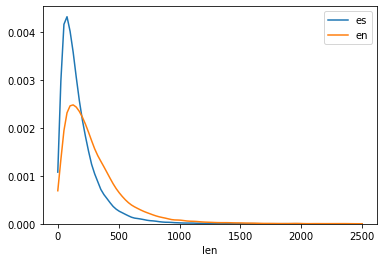

In [67]:
# density distibution for en and es
sns.distplot(df_es['len'], hist=False, kde_kws={'clip': (0, 2500)}, label = 'es')
sns.distplot(df_en['len'], hist=False, kde_kws={'clip': (0, 2500)}, label = 'en')